## Problem 3: How many people live in the dominance area of each shopping center? 

Find out how many people live under the dominance area of each shopping center. You should be able to do this based on the output from problem 2, lesson materials from weeks 2, 3 and 4 and these additional hints:

- You can read in the population data from the HSY WFS service: https://kartta.hsy.fi/geoserver/wfs (check more hints from the lesson materials)
- Aggregate your dominance areas from problem 2 into a unified geometries using [`dissolve()`](http://geopandas.org/aggregation_with_dissolve.html#dissolve-example) -function in geopandas before joining with the population data.
- Remember to check the crs of the input data.
- Join information between the population grid and the dominance areas -layer using `intersect` as the condition in the spatial join.

You can freely organize your code into the code cells below.



In [59]:
import requests
import pandas as pd
import geopandas as gpd
import geojson
from pyproj import CRS
# For available features, see http://geo.stat.fi/geoserver/tilastointialueet/wfs?request=GetCapabilities
url = "https://kartta.hsy.fi/geoserver/wfs"

proxies = {
 "http": "http://10.1.10.99:8080",
 "https": "http://10.1.10.99:8080"
}

params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature',
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2020', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params, proxies=proxies)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))
# Change the name of a column
pop = pop.rename(columns={'asukkaita': 'pop20'})[['geometry','pop20']]
pop.head()

,geometry,pop20
0,"POLYGON ((25472499.995 6685998.998, 25472499.9...",5
1,"POLYGON ((25472499.995 6684249.004, 25472499.9...",8
2,"POLYGON ((25472499.995 6683999.005, 25472499.9...",5
3,"POLYGON ((25472499.995 6682998.998, 25472499.9...",13
4,"POLYGON ((25472749.993 6690249.003, 25472749.9...",5


In [60]:
dom = gpd.read_file("data/service_dominance.gpkg")
dom.head()

,x,y,YKR_ID,pt_r_t_Jumbo,pt_r_t_Dixi,pt_r_t_Myyrmanni,pt_r_t_Itis,pt_r_t_Forum,pt_r_t_IsoOmena,pt_r_t_Ruoholahti,min_t,dominant_service,geometry
0,381875.0,6697880.0,5785640,101.0,102.0,90.0,132.0,110.0,141.0,118.0,90.0,Myyrmanni,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,108.0,109.0,93.0,135.0,113.0,143.0,121.0,93.0,Myyrmanni,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,109.0,111.0,95.0,137.0,115.0,145.0,123.0,95.0,Myyrmanni,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,114.0,115.0,99.0,141.0,119.0,149.0,127.0,99.0,Myyrmanni,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,98.0,99.0,83.0,125.0,103.0,134.0,111.0,83.0,Myyrmanni,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [61]:
# Conduct the aggregation
dissolved = dom.dissolve(by="dominant_service")[['geometry']]

dissolved = dissolved.reset_index()
# What did we get
dissolved.head()

,dominant_service,geometry
0,Dixi,"MULTIPOLYGON (((384500.000 6675750.000, 384250..."
1,Forum,"MULTIPOLYGON (((377750.000 6676750.000, 378000..."
2,IsoOmena,"MULTIPOLYGON (((363250.000 6676750.000, 363000..."
3,Itis,"MULTIPOLYGON (((389750.000 6672500.000, 389750..."
4,Jumbo,"MULTIPOLYGON (((375250.000 6684750.000, 375250..."


In [62]:
dissolved = dissolved.to_crs(CRS.from_epsg(3879).to_wkt())

In [63]:
pop.crs = CRS.from_epsg(3879).to_wkt()

pop.crs

<Derived Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [64]:
dissolved.crs

<Derived Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [65]:
pop

,geometry,pop20
0,"POLYGON ((25472499.995 6685998.998, 25472499.9...",5
1,"POLYGON ((25472499.995 6684249.004, 25472499.9...",8
2,"POLYGON ((25472499.995 6683999.005, 25472499.9...",5
3,"POLYGON ((25472499.995 6682998.998, 25472499.9...",13
4,"POLYGON ((25472749.993 6690249.003, 25472749.9...",5
...,...,...
5832,"POLYGON ((25513249.999 6686248.997, 25513249.9...",7
5833,"POLYGON ((25513249.999 6685998.998, 25513249.9...",6
5834,"POLYGON ((25513249.999 6685748.999, 25513249.9...",14
5835,"POLYGON ((25513249.999 6685499.000, 25513249.9...",12


In [71]:
# Make a spatial join
join = gpd.sjoin(dissolved, pop, how="inner", op="intersects")

C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\IPython\core\interactiveshell.py:3191: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [72]:
join = join.dissolve(by='dominant_service', aggfunc='sum')

In [92]:
join = join.reset_index()
join['pop_dens20'] = join['pop20'].div(join.geometry.area)
join.head()

,index,dominant_service,geometry,index_right,pop20,pop_dens20
0,0,Dixi,"MULTIPOLYGON (((25495268.205 6687855.840, 2549...",5665234,226698,0.002069
1,1,Forum,"MULTIPOLYGON (((25472963.164 6689180.496, 2547...",1913583,266543,0.005081
2,2,IsoOmena,"MULTIPOLYGON (((25472175.460 6690407.391, 2547...",1292167,207459,0.000991
3,3,Itis,"MULTIPOLYGON (((25495495.588 6680357.505, 2549...",4466899,215670,0.001818
4,4,Jumbo,"MULTIPOLYGON (((25485043.370 6686795.170, 2548...",1927568,80696,0.001159


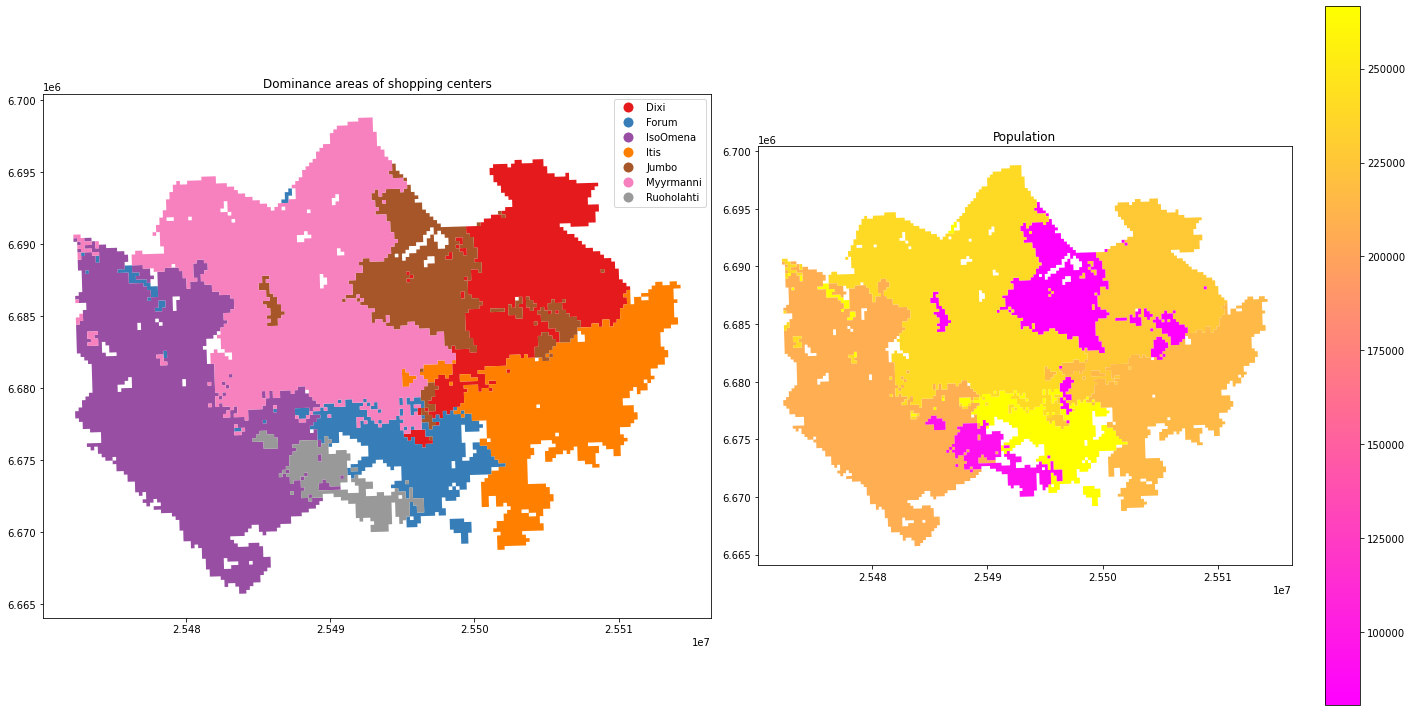

In [82]:
import matplotlib.pyplot as plt
# Define output filename for the figure in here and use it when saving the file:

fig, ax = plt.subplots(1,3, figsize=(20,10))
join.plot(ax=ax[0], column='dominant_service', linewidth=0, legend=True, cmap="Set1")
ax[0].set_title("Dominance areas of shopping centers")
join.plot(ax=ax[1], column='pop20', linewidth=0, legend=True, cmap="spring")
ax[1].set_title("Population")
join.plot(ax=ax[2], column='p', linewidth=0, legend=True, cmap="spring")
ax[1].set_title("Population")
fig.patch.set_facecolor('white')
plt.tight_layout()

Remember to print the answers in this notebook :)

### Extra bonus task

Repeat problem 2 and 3 for car accessibility! No extra points available for this, but you can for example start thinking if you want to make the final assignment related to this topic :)